# Titanic Survival Classification project

- Just finished my GBT tutorial, try to apply what I have learnt to this project.


### Problems identification
- Given the passagers' dataset, try the predict whether they survive or not in the accident.

### Data
#### Data downloaded from kaggle

#### training set (train.csv)
#### test set (test.csv)
- The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

#### Data Dictionary
- survival:Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex
- Age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- More info: see-> https://www.kaggle.com/c/titanic/data

In [1]:
# Import the tools for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Read the data
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

# Basic information of the data

In [3]:
# size
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Combined the data for preprocessing

In [8]:
comp_df = pd.concat([train_df, test_df])
comp_df.reset_index(drop=True, inplace=True)

In [9]:
comp_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Basic Data analysis

In [10]:
# Check for missing data
comp_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- There is over 1000 missing data in 'Cabin' column, I will drop this column.
- over 250 in Age
- Ignore the missing data in 'Survived' column

In [11]:
# Descriptive statistic of the data
comp_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


The variance of Fare is quite high.

In [12]:
comp_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data EDA and filling missing data.

#### Drop the passengerID and Cabin column

In [13]:
comp_df.drop('PassengerId',axis=1, inplace=True)
comp_df.drop('Cabin',axis=1,inplace=True)
comp_df.drop("Ticket",axis=1, inplace=True)

#### Number of survival vs not survival

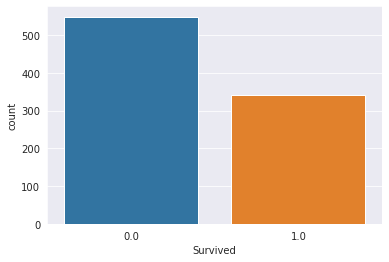

In [14]:
sns.countplot('Survived',data=comp_df)

### Survived vs Sex, Pclass, Embarled

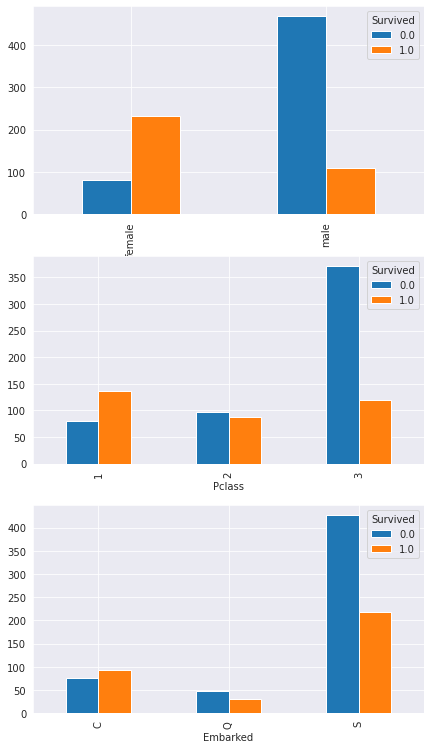

In [15]:
fig ,(ax1, ax2,ax3)= plt.subplots(3,1,figsize=(7,13))
pd.crosstab(comp_df.Sex, comp_df.Survived).plot.bar(ax=ax1)
pd.crosstab(comp_df.Pclass, comp_df.Survived).plot.bar(ax=ax2)
pd.crosstab(comp_df.Embarked, comp_df.Survived).plot.bar(ax=ax3)
plt.show()

- Female survivral rate > male
- Pclass 3 survivral rate < other pclass
- People embarked at S have lower survival rate than other

#### Correlation

Text(0.5, 1.0, 'Correlation among numerical columns')

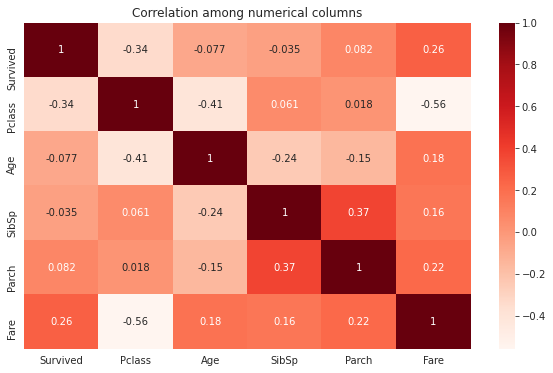

In [16]:
# Correlation graph
plt.figure(figsize=(10,6))
sns.heatmap(comp_df.corr(),annot=True,cmap='Reds')
plt.title('Correlation among numerical columns')

### Age

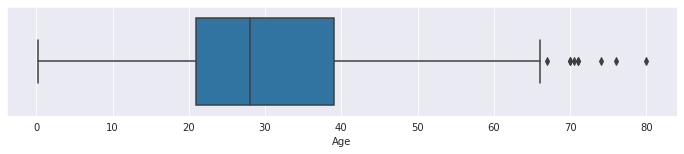

In [17]:
plt.figure(figsize=(12,2))
sns.boxplot(comp_df.Age)

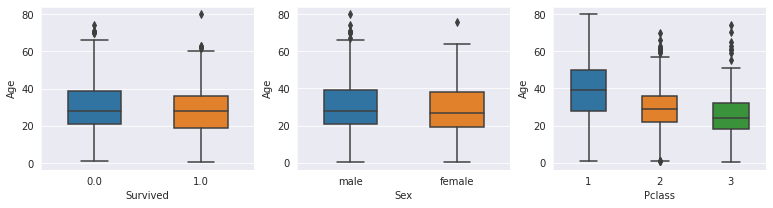

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(13,3))
sns.boxplot(x='Survived',y='Age',data=comp_df,ax=ax1, width=0.5)
sns.boxplot(x='Sex', y='Age', data=comp_df,ax=ax2, width=0.5)
sns.boxplot(x='Pclass', y='Age', data=comp_df,ax=ax3, width=0.5)

Age and Pclass has a more obvious negative correlation, now fill the missing age according to their pclass

In [19]:
# Fill the missing value according to their pclass
p1 = comp_df[comp_df.Pclass==1]['Age'].median() 
p2 = comp_df[comp_df.Pclass==2]['Age'].median() 
p3 = comp_df[comp_df.Pclass==3]['Age'].median() 
def fill_age(row):
    if np.isnan(row.Age):
        if row.Pclass == 1:
            return p1
        elif row.Pclass == 2:
            return p2
        elif row.Pclass == 3:
            return p3
    else:
        return row.Age
comp_df.Age = comp_df.apply(fill_age, axis=1)

In [20]:
# Drop the extreme outliers
comp_df = comp_df[comp_df.Age<80]

### Fare 

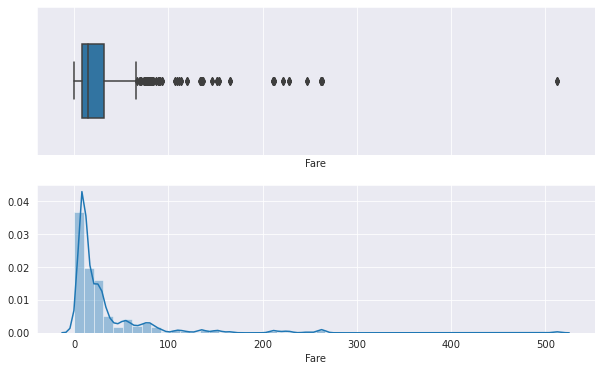

In [21]:
# Distribution of numerical data
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,6), sharex=True)
sns.boxplot('Fare',data=comp_df, width=0.5,ax=ax1)
sns.distplot(comp_df.Fare,ax=ax2)

- There are missing data in Fare column, we fill it with median


In [22]:
comp_df.Fare.isnull().sum()

1

In [23]:
comp_df.Fare.fillna(comp_df.Fare.median(), inplace=True)

- There are many outliers in Fare column ,I am going to filter out it.

In [24]:
from scipy.stats import iqr

upper_limit = comp_df.Fare.quantile(0.75) + (1.5 * iqr(comp_df.Fare))
lower_limit = comp_df.Fare.quantile(0.25) - (1.5 * iqr(comp_df.Fare))

In [25]:
# Number of outliers
comp_df[(comp_df.Fare>upper_limit ) & (comp_df.Survived.notnull())].shape

(116, 9)

There 116 rows of outliers in training set, I don't want to drop too much row, lets make the threshold higher to 100.

In [26]:
comp_df[(comp_df.Fare>100 ) & (comp_df.Survived.notnull())].shape

(53, 9)

In [27]:
#Lets drop the outliers
train_df = comp_df[comp_df.Survived.notnull()]
test_df = comp_df[comp_df.Survived.isnull()]

In [28]:
train_df.shape, test_df.shape
train_df = train_df[train_df.Fare<=100]
comp_df = pd.concat([train_df,test_df])

In [29]:
comp_df.shape

(1255, 9)

### Embarked

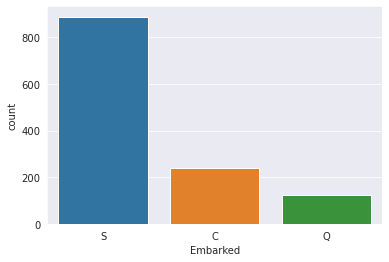

In [30]:
sns.countplot(comp_df.Embarked)

In [31]:
comp_df.Embarked.isnull().sum()

2

In [32]:
# Fill the missing value
comp_df.Embarked.value_counts()

S    889
C    241
Q    123
Name: Embarked, dtype: int64

In [33]:
comp_df.Embarked.fillna('S',inplace=True)

In [34]:
comp_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

#### No more missing values now.

### Combine SibSp and Parch into 'family_size' column

In [35]:
comp_df['family_size'] = comp_df.SibSp + comp_df.Parch

Text(0, 0.5, 'Number of passenager')

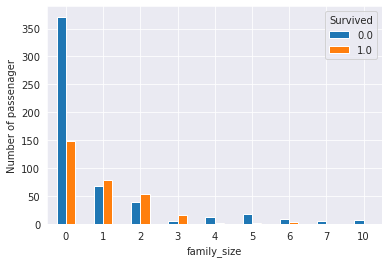

In [36]:
pd.crosstab(comp_df.family_size, comp_df.Survived).plot.bar(figsize=(6,4))
plt.xticks(rotation=None)
plt.ylabel('Number of passenager')

The passenager with family size 0 has lower rate of survivral than other group,

In [37]:
# now we drop the columns of sibsp and parch
comp_df.drop(['SibSp','Parch'], axis=1, inplace=True)

### Name
- extracting title from name and create new column for it.

In [38]:
# Extract title from name
comp_df['title'] = comp_df.Name.str.extract(r'([\w]+[.])')

In [39]:
# check any missing value
comp_df.title.isnull().sum()

0

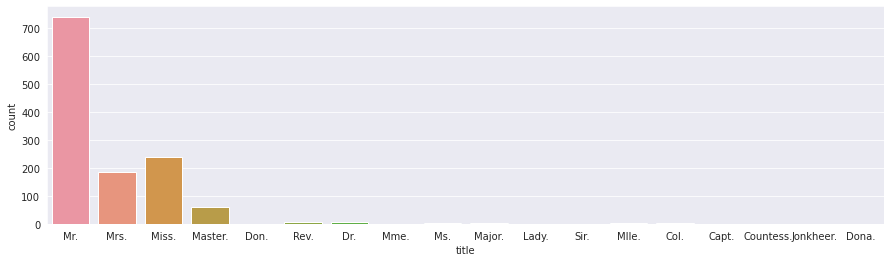

In [40]:
# plot the title
plt.figure(figsize=(15,4))
sns.countplot(comp_df.title)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

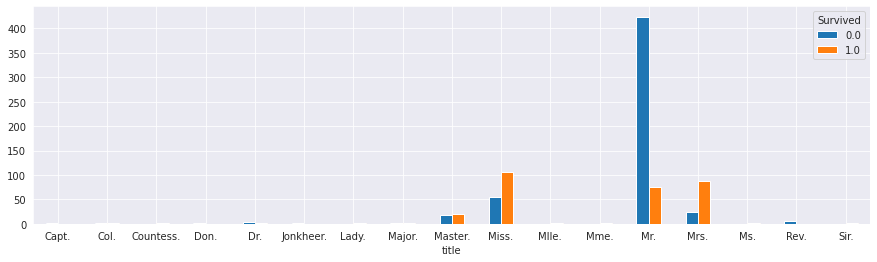

In [41]:
pd.crosstab(comp_df.title, comp_df.Survived).plot.bar(figsize=(15,4))
plt.xticks(rotation=None)

Like gender, the survival rate of Mr. is lower than Miss. or Mrs.

# Features Engineering

#### Label encoding : Sex, embarked

In [42]:
# label encoding
# age male to 1, female to 0
comp_df.Sex = comp_df.Sex.map({'male':1,'female':0})
# Embarked to 0,1,2
comp_df.Embarked = comp_df.Embarked.map({'C':0, 'Q':1,'S':2})

#### Family size 
- family size > 4 --> 4

In [43]:
# Group family size > 10 to 4
#comp_df.drop('family_size',axis=1,inplace=True)
comp_df.family_size= comp_df.apply(lambda x:4 if x.family_size>4 else x.family_size,axis=1)

In [44]:
# Formatting the title
# To Mr.
comp_df['title'] = comp_df['title'].str.replace(r'Sir.', 'Mr.')
comp_df['title'] = comp_df['title'].str.replace(r'Rev.','Mr.')

# To Ms
comp_df['title'] = comp_df['title'].str.replace(r'Lady.','Ms.')
comp_df['title'] = comp_df['title'].str.replace(r'Mrs.','Ms.')
comp_df['title'] = comp_df['title'].str.replace(r'Miss.','Ms.')

# to other
comp_df['title'] = comp_df['title'].str.replace(r'Mlle.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Mme.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Dona.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Countess.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Major.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Jonkheer.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Col.','other')
comp_df['title'] = comp_df['title'].str.replace(r'Capt.','other')

# to scholar
comp_df['title'] = comp_df['title'].str.replace(r'Master.','scholar')
comp_df['title'] = comp_df['title'].str.replace(r'Dr.','scholar')
comp_df['title'] = comp_df['title'].str.replace('Don.','scholar')

In [45]:
comp_df.drop('Name',axis=1, inplace=True)

In [46]:
# label encoding the title
comp_df.title = comp_df.title.map({'other':0, 'scholar':1, 'Ms.':2, 'Mr.':3})

### Binning the age and fare

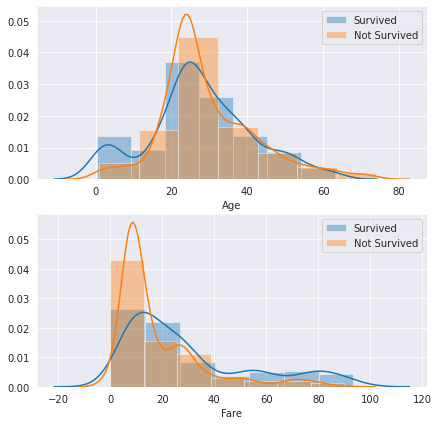

In [47]:
bins = 7
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,7))
sns.distplot(comp_df[comp_df.Survived==1].Age, bins=bins, label='Survived',ax=ax1)
sns.distplot(comp_df[comp_df.Survived==0].Age,bins=bins,label='Not Survived',ax=ax1)
ax1.legend()

sns.distplot(comp_df[comp_df.Survived==1].Fare, bins=bins, label='Survived',ax=ax2)
sns.distplot(comp_df[comp_df.Survived==0].Fare,bins=bins,label='Not Survived',ax=ax2)
ax2.legend()

In [48]:
# Binnings the Age and Fare
comp_df.Age = pd.cut(comp_df.Age, 7, labels=[0,1,2,3,4,5,6])
comp_df.Fare = pd.cut(comp_df.Fare, 7, labels=[0,1,2,3,4,5,6])
comp_df.Age = comp_df.Age.astype('int')
comp_df.Fare = comp_df.Fare.astype('int')

In [49]:
# final check for datatype
comp_df.dtypes

Survived       float64
Pclass           int64
Sex              int64
Age              int64
Fare             int64
Embarked         int64
family_size      int64
title            int64
dtype: object

In [50]:
comp_df

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,title
0,0.0,3,1,2,0,2,1,3
1,1.0,1,0,3,0,0,1,2
2,1.0,3,0,2,0,2,0,2
3,1.0,1,0,3,0,2,1,2
4,0.0,3,1,3,0,2,0,3
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,2,0,2,0,3
1305,NaN,1,0,3,1,0,0,0
1306,NaN,3,1,3,0,2,0,3
1307,NaN,3,1,2,0,2,0,3


## Split back to train and test set

In [51]:
train_df = comp_df[comp_df.Survived.notnull()]
test_df = comp_df[comp_df.Survived.isnull()]

In [52]:
test_df.drop('Survived',axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Split train set to x and y

In [53]:
x_train = train_df.drop('Survived',axis=1)
y_train = train_df.Survived

## Start training model

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [55]:
# Fit to the model without any tuning
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=11)
scores = cross_val_score(model, x_train, y_train, cv=cv, n_jobs=-1, verbose=True, scoring='roc_auc')
print(np.mean(scores),np.std(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8353069024593676 0.05019771623797875


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.9s finished


### Grid search the hyperparameters

In [56]:
#model = XGBClassifier(random_state=11)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=11)
#params = {
    #'n_estimators':[50,100,200,500],
    #'max_depth':[3,6,9],
    #'subsample':[0.3,0.5,0.7,1],
    #'learning_rate':[0.0001,0.001,0.01,0.1,1],
    #'colsample_bytree':[0.3,0.5,0.7,1]
#}
#model_grid = GridSearchCV(model, params, cv=cv,n_jobs=-1, verbose=1, scoring='roc_auc')
#model_grid.fit(x_train, y_train)
#print('Best mark:',model_grid.best_score_, '\nBest params:',model_grid.best_params_)

# Predict the answer

In [57]:
### Plot the learning curve of the model with best params
best_model = XGBClassifier(n_estimators=100, 
                           subsample=0.7, 
                           max_depth=3, 
                           learning_rate=0.01, 
                           colsample_bytree=1)

# Save the output

In [58]:
best_model.fit(x_train,y_train)
answer = pd.DataFrame(best_model.predict(test_df))
test_file  = pd.read_csv('../input/titanic/test.csv')
answer['PassengerId']= test_file.PassengerId.tolist()
answer.set_index('PassengerId',inplace=True)
answer.columns=['Survived']
answer.Survived = answer.Survived.astype('int')
answer.to_csv('answer_xgb_binning_new02_bin7_familysize02.csv')